In [3]:
import os
import pandas as pd 
import cv2  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

In [4]:
train_path = '../data/samples10-m-2'
#train_path = '../data/train'
cameras = os.listdir(train_path)

train_images = []
for camera in cameras:
    for fname in sorted(os.listdir(train_path+ '/'+ camera)):
        train_images.append((camera, fname))

train = pd.DataFrame(train_images, columns=['camera', 'fname'])
print(train.shape)
train.sample(5)

(180, 2)


,camera,fname
86,HTC-1-M7,(HTC-1-M7)9-r0.5-512.jpg
71,HTC-1-M7,(HTC-1-M7)7-r2.0-512.jpg
170,iPhone-4s,(iP4s)8-r2.0-512.jpg
78,HTC-1-M7,(HTC-1-M7)8-r0.8-512.jpg
136,iPhone-4s,(iP4s)5-g0.8-512.jpg


In [46]:
data = pd.DataFrame(columns=['image','camera'])
images = []
cameras = []
input_path = '../data/samples10-m-2/'
#input_path = '../data/train/'

for img in train_images:
    im_path = input_path+img[0]+'/'+img[1]
    image = cv2.imread(im_path)    
    ni = image.reshape(-1)
    images.append (ni)
    cameras.append(img[0])

print('Images shape:', np.array(images).shape)

Images shape: (180, 786432)


In [49]:
y = np.array(cameras)
y.shape

(180,)

In [54]:
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(images)

In [58]:
len(np.unique(y))

2

In [60]:
np.unique(y)

array(['HTC-1-M7', 'iPhone-4s'], 
      dtype='<U9')

In [95]:
print(len(X_2d),len(y))

180 180


range(0, 180)


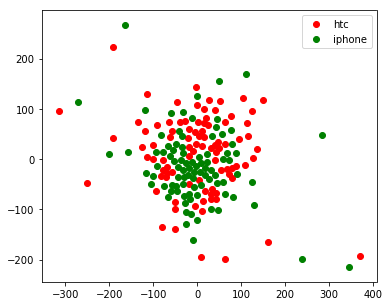

In [110]:
#target_ids = range(len(np.unique(y)))
target_ids = range(len(y))
print(target_ids)

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
for i in target_ids:
    if(y[i]=='HTC-1-M7'):
        htc = plt.scatter(X_2d[i,0],X_2d[i,1],c='r',label=y[i])
    if(y[i]=='iPhone-4s'):
        ip= plt.scatter(X_2d[i,0],X_2d[i,1],c='g',label=y[i])
plt.legend()
plt.legend([htc, ip], ['htc', 'iphone'])
plt.show()